# Limpieza y preparación de datos
## 1. Importamos pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Leer el dataset

In [2]:
personality_df = pd.read_csv('../data/personality_dataset.csv')
personality_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [3]:
personality_df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [4]:
personality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


## 3. Calculamos datos nulos

In [5]:
round(personality_df.isnull().sum() / len(personality_df) * 100, 2)

Time_spent_Alone             2.17
Stage_fear                   2.52
Social_event_attendance      2.14
Going_outside                2.28
Drained_after_socializing    1.79
Friends_circle_size          2.66
Post_frequency               2.24
Personality                  0.00
dtype: float64

## 4. Contamos datos duplicados

In [6]:
personality_df.duplicated().sum()

np.int64(388)

In [7]:
# Eliminamos datos duplicados
personality_df.drop_duplicates(inplace=True)

In [8]:
# Volvemos a contar datos nulos
round(personality_df.isnull().sum() / len(personality_df) * 100, 2)

Time_spent_Alone             2.43
Stage_fear                   2.91
Social_event_attendance      2.43
Going_outside                2.59
Drained_after_socializing    2.03
Friends_circle_size          2.99
Post_frequency               2.51
Personality                  0.00
dtype: float64

## 5. Guardamos los datos dependiento de la personalidad para mejor tratamiento de datos nulos

In [9]:
extrovert_df = personality_df[personality_df['Personality'] == 'Extrovert']
introvert_df = personality_df[personality_df['Personality'] == 'Introvert']

## 6. Vemos como se distribuyen los datos

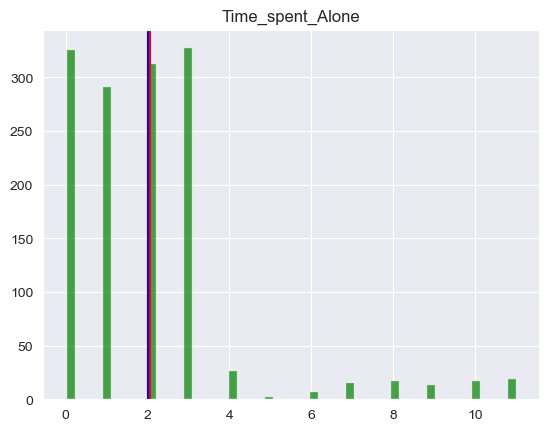

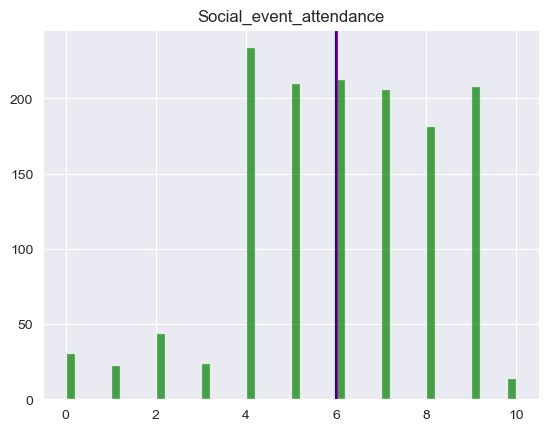

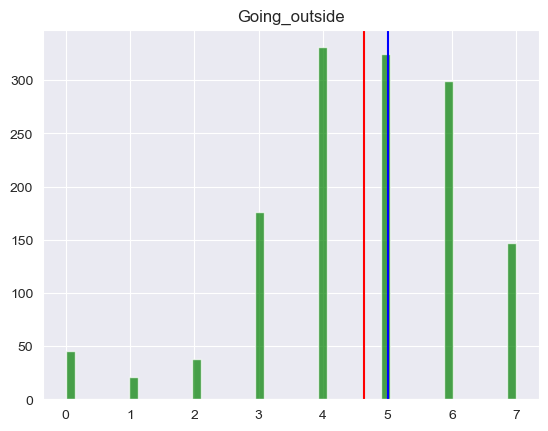

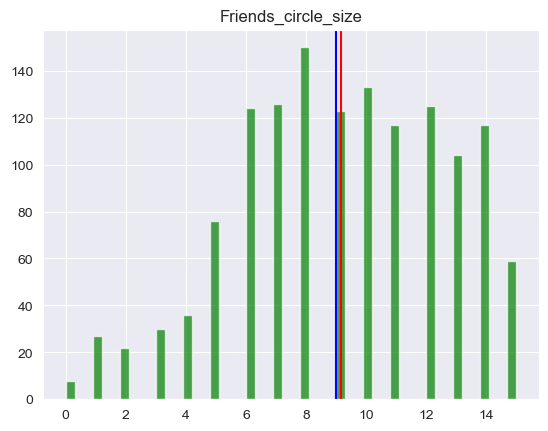

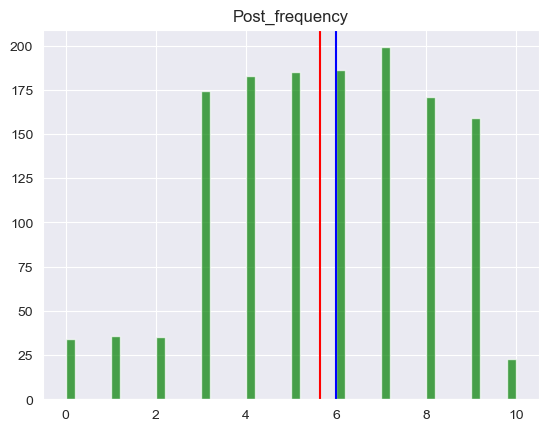

In [10]:
# Datos numéricos extrovertidos
extro_numeric_columns = extrovert_df.select_dtypes(include=['number']).columns.tolist()

for column in extro_numeric_columns:
    plt.title(column)
    plt.hist(extrovert_df[column], bins=50, color='green', alpha=0.7)
    plt.axvline(extrovert_df[column].mean(), color='r')
    plt.axvline(extrovert_df[column].median(), color='b')
    plt.show()

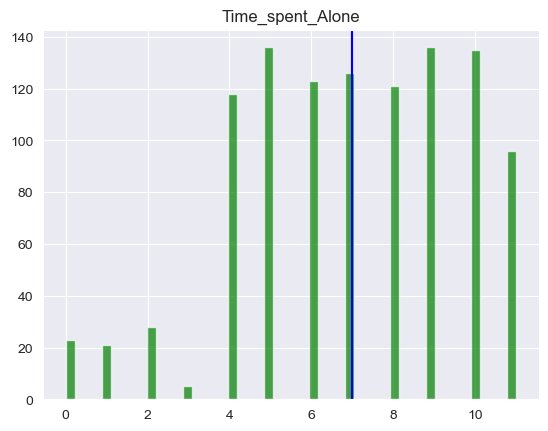

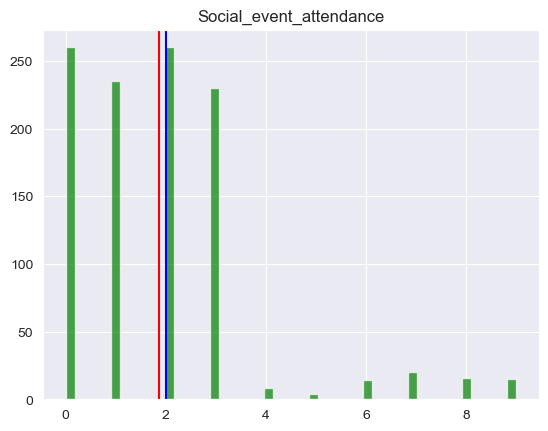

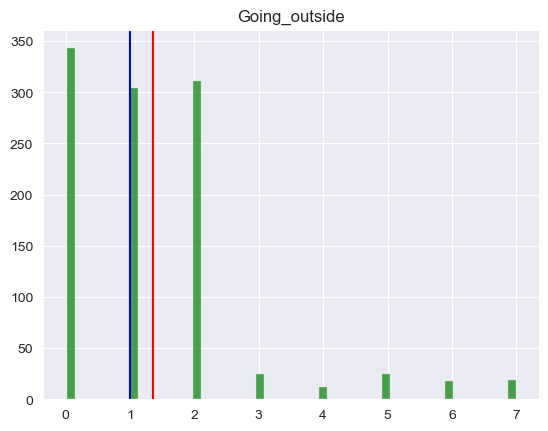

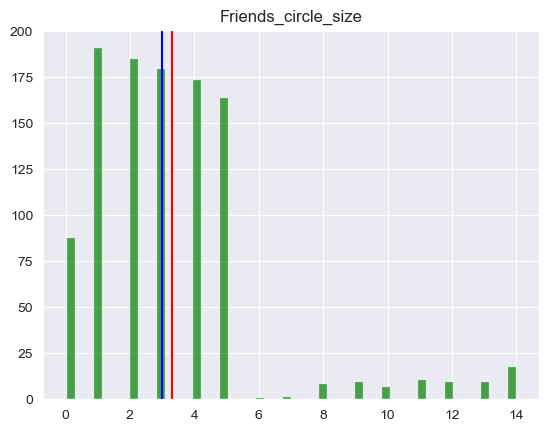

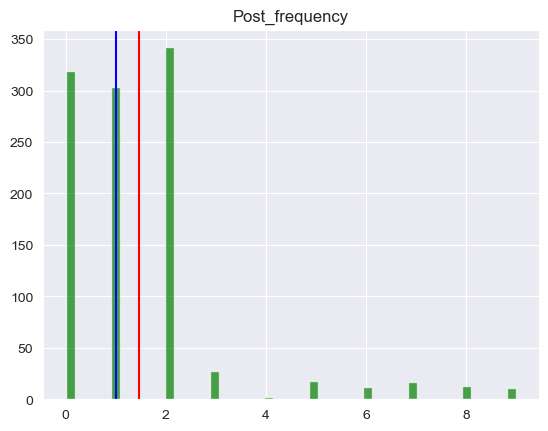

In [11]:
# Datos numéricos introvertidos
intro_numeric_columns = introvert_df.select_dtypes(include=['number']).columns.tolist()

for column in intro_numeric_columns:
    plt.title(column)
    plt.hist(introvert_df[column], bins=50, color='green', alpha=0.7)
    plt.axvline(introvert_df[column].mean(), color='r')
    plt.axvline(introvert_df[column].median(), color='b')
    plt.show()

### Insights:
- Logramos ver patrones comunes de los introvertidos y de los extrovertidos como se sabe bien.
- Hay una muy clara diferencia entre los dos tipos de personas.
- Se usará la mediana para rellenar los datos nulos, debido a que la media rellenaría con decimales, y en ese caso sería mejor la mediana

## Rellenamos datos nulos en columnas numéricas

In [12]:
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

for col in numeric_cols:
    personality_df[col] = personality_df.groupby('Personality')[col].transform(lambda x: x.fillna(x.median()))

In [13]:
personality_df = round(personality_df)
personality_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,1.0,Yes,2.0,0.0,Introvert


## Rellenamos datos nulos en columnas categoricas

In [14]:
personality_df.loc[(personality_df['Personality'] == 'Extrovert') & (personality_df['Stage_fear'].isna()), 'Stage_fear'] = 'No'
personality_df.loc[(personality_df['Personality'] == 'Extrovert') & (personality_df['Drained_after_socializing'].isna()), 'Drained_after_socializing'] = 'No'

In [15]:
personality_df.loc[(personality_df['Personality'] == 'Introvert') & (personality_df['Stage_fear'].isna()), 'Stage_fear'] = 'Yes'
personality_df.loc[(personality_df['Personality'] == 'Introvert') & (personality_df['Drained_after_socializing'].isna()), 'Drained_after_socializing'] = 'Yes'

Se rellenan con la moda porque es el que más suena en cada tipo de personalidad

## Datos Limpios

In [16]:
personality_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,1.0,Yes,2.0,0.0,Introvert


## Se exporta el DataFrame

In [17]:
personality_df.to_csv('../data/personality_dataset_clean.csv', index=False)